In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Dataset/TON_IoT/train_test_network.csv')

data.head()

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor


In [ ]:
missing_values = data.isnull().sum()


print("Missing values in each column:")
print(missing_values)

Missing values in each column:
src_ip                    0
src_port                  0
dst_ip                    0
dst_port                  0
proto                     0
service                   0
duration                  0
src_bytes                 0
dst_bytes                 0
conn_state                0
missed_bytes              0
src_pkts                  0
src_ip_bytes              0
dst_pkts                  0
dst_ip_bytes              0
dns_query                 0
dns_qclass                0
dns_qtype                 0
dns_rcode                 0
dns_AA                    0
dns_RD                    0
dns_RA                    0
dns_rejected              0
ssl_version               0
ssl_cipher                0
ssl_resumed               0
ssl_established           0
ssl_subject               0
ssl_issuer                0
http_trans_depth          0
http_method               0
http_uri                  0
http_version              0
http_request_body_len     0
http_response_bod

In [ ]:
import pandas as pd

label_distribution = data['label'].value_counts()
print("\nLabel class distribution:")
print(label_distribution)


Label class distribution:
label
1    161043
0     50000
Name: count, dtype: int64


In [ ]:
duplicates = data.duplicated()
data[duplicates]

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
21,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000127,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
151,192.168.1.193,49194,192.168.1.33,8080,tcp,-,0.000019,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
322,192.168.1.193,49234,192.168.1.37,8080,tcp,-,0.000167,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
330,192.168.1.193,49234,192.168.1.37,8080,tcp,-,0.000163,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
348,192.168.1.193,49236,192.168.1.37,8080,tcp,-,0.000112,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211032,192.168.1.32,47514,18.194.169.124,80,tcp,-,0.000000,0,0,SH,...,0,0,-,-,-,-,-,-,1,xss
211033,192.168.1.32,47518,18.194.169.124,80,tcp,-,0.000000,0,0,SH,...,0,0,-,-,-,-,-,-,1,xss
211034,192.168.1.32,47634,18.194.169.124,80,tcp,-,0.000000,0,0,SH,...,0,0,-,-,-,-,-,-,1,xss
211035,192.168.1.32,48134,18.194.169.124,80,tcp,-,0.000000,0,0,SH,...,0,0,-,-,-,-,-,-,1,xss


In [ ]:
# Remove duplicate rows
data= data.drop_duplicates()

# Print the head of the cleaned dataset
data.head()

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify the target variable
categorical_target = 'type'
binary_target = 'label'

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the target variable
if categorical_target in data.columns:
    data[categorical_target] = label_encoder.fit_transform(data[categorical_target])

# Apply label encoding to each categorical feature
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to numerical features excluding the target variables
features_to_scale = data.columns.difference([categorical_target, binary_target])
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Bidirectional, LSTM, MultiHeadAttention, GlobalAveragePooling1D



# Assume 'binary_target' and 'multi_class_target' are the names of the target variables
X = data.drop(columns=['label', 'type'])
y_binary = data['label']
y_multi_class = data['type']

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X, y_binary, and y_multi_class are already defined
X_train, X_test, y_train_binary, y_test_binary, y_train_multi_class, y_test_multi_class = train_test_split(
    X, y_binary, y_multi_class, test_size=0.2, random_state=42)

In [ ]:
# Check class distribution for the multi-class target variable
print(y_train_multi_class.value_counts())

type
5    33651
1    16000
8    15928
6    15913
3    15886
2    15236
0    14997
9    12146
7    11791
4      831
Name: count, dtype: int64


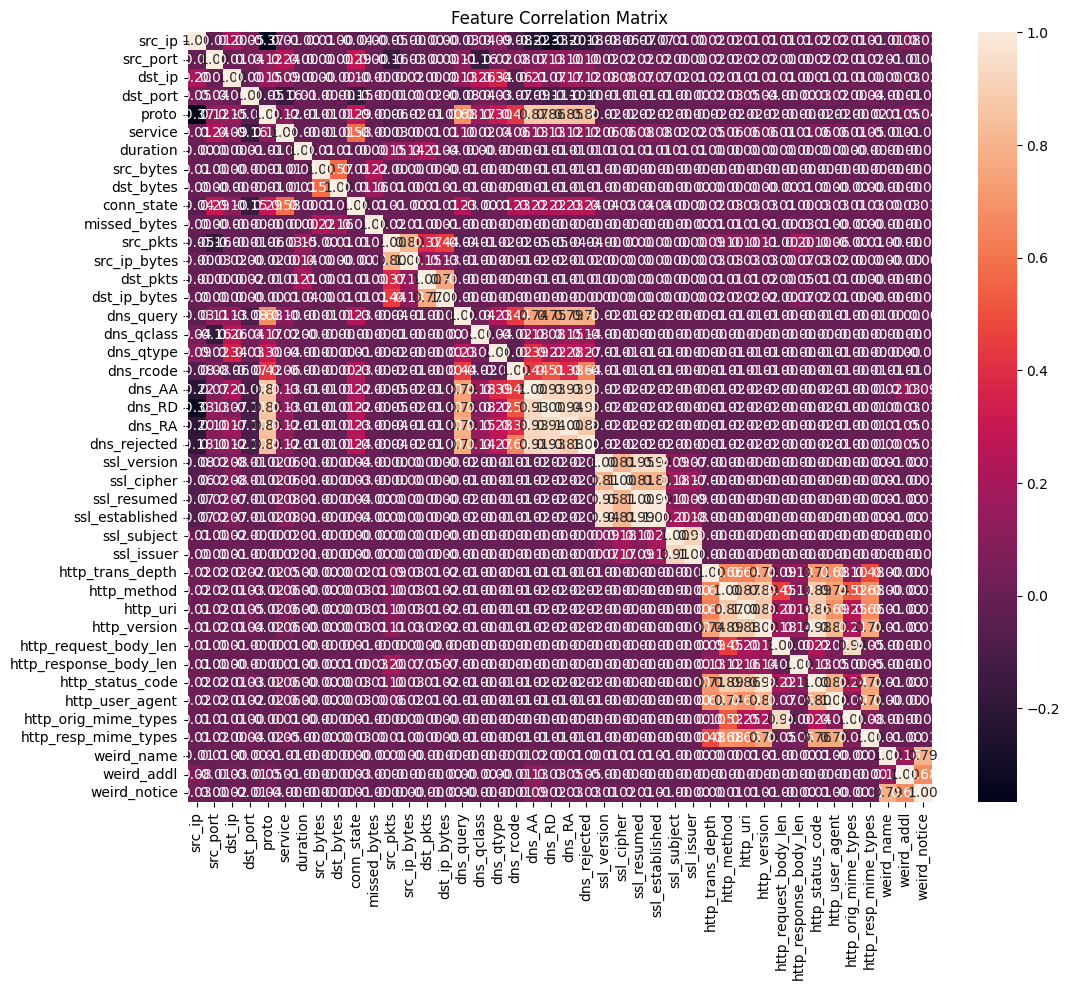

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_train is a DataFrame
corr_matrix = pd.DataFrame(X_train).corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

**Best_Accuracy- CNN+Bi-GRU with selected features([ 0, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 16, 18, 20, 24, 27, 28, 29, 31, 32, 34, 35, 36, 40, 41] with Epochs = 30, droupout = .01**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X, y_binary, and y_multi_class are already defined
# Convert to DataFrame if it's not already
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)

# Selected features indices
selected_features_indices = [ 0, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 16, 18, 20, 24, 27, 28, 29, 31, 32, 34, 35, 36, 40, 41]

# Extract the selected features using iloc
X_selected = X.iloc[:, selected_features_indices]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Reshape for Conv1D layer
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train_binary, y_test_binary, y_train_multi_class, y_test_multi_class = train_test_split(
    X_scaled, y_binary, y_multi_class, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Bidirectional, GRU, MultiHeadAttention, LayerNormalization, Add, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Model

# Define the hybrid model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# CNN for feature extraction
x = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.01)(x)

# Bidirectional GRU for sequence modeling
x = Bidirectional(GRU(50, return_sequences=True))(x)

# Multi-Head Attention
attention_output = MultiHeadAttention(num_heads=2, key_dim=50)(x, x)
attention_output = Add()([x, attention_output])
attention_output = LayerNormalization()(attention_output)

# Flatten and Dense layers for classification
x = GlobalAveragePooling1D()(attention_output)
x = Dense(100, activation='relu')(x)
x = Dropout(0.01)(x)

# Output layers for binary and multi-class classification
binary_output = Dense(1, activation='sigmoid', name='binary_output')(x)
multi_class_output = Dense(len(np.unique(y_train_multi_class)), activation='softmax', name='multi_class_output')(x)

# Define the model
model01 = Model(inputs=input_layer, outputs=[binary_output, multi_class_output])

In [ ]:
# Compile the model
model01.compile(optimizer='adam',
              loss={'binary_output': 'binary_crossentropy', 'multi_class_output': 'sparse_categorical_crossentropy'},
              metrics={'binary_output': 'accuracy', 'multi_class_output': 'accuracy'})

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint_path = '/content/drive/MyDrive/Save_Model_TON_IoT/CNN+BiGRU.h5'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_acc', save_best_only=True, save_weights_only=False)

In [ ]:
# Train the model
history = model01.fit(X_train, {'binary_output': y_train_binary, 'multi_class_output': y_train_multi_class},
                    epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30
3810/3810 [==============================] - 132s 33ms/step - loss: 0.4766 - binary_output_loss: 0.0299 - multi_class_output_loss: 0.4467 - binary_output_accuracy: 0.9906 - multi_class_output_accuracy: 0.8334 - val_loss: 0.2918 - val_binary_output_loss: 0.0050 - val_multi_class_output_loss: 0.2868 - val_binary_output_accuracy: 0.9987 - val_multi_class_output_accuracy: 0.8960
Epoch 2/30
3810/3810 [==============================] - 115s 30ms/step - loss: 0.2753 - binary_output_loss: 0.0075 - multi_class_output_loss: 0.2678 - binary_output_accuracy: 0.9981 - multi_class_output_accuracy: 0.8923 - val_loss: 0.2496 - val_binary_output_loss: 0.0073 - val_multi_class_output_loss: 0.2423 - val_binary_output_accuracy: 0.9981 - val_multi_class_output_accuracy: 0.8998
Epoch 3/30
3810/3810 [==============================] - 117s 31ms/step - loss: 0.2449 - binary_output_loss: 0.0054 - multi_class_output_loss: 0.2395 - binary_output_accuracy: 0.9985 - multi_class_output_accuracy: 0.9007 - 

In [ ]:
model01.save('/content/drive/MyDrive/Save_Model_TON_IoT/CNN+BiGRU.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict the test set
y_pred_binary, y_pred_multi_class = model01.predict(X_test)
y_pred_binary = (y_pred_binary > 0.5).astype(int)
y_pred_multi_class = np.argmax(y_pred_multi_class, axis=1)

# Evaluate binary classification
binary_accuracy = accuracy_score(y_test_binary, y_pred_binary)
binary_precision = precision_score(y_test_binary, y_pred_binary)
binary_recall = recall_score(y_test_binary, y_pred_binary)
binary_f1 = f1_score(y_test_binary, y_pred_binary)
binary_confusion_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Evaluate multi-class classification
multi_class_accuracy = accuracy_score(y_test_multi_class, y_pred_multi_class)
multi_class_precision = precision_score(y_test_multi_class, y_pred_multi_class, average='weighted')
multi_class_recall = recall_score(y_test_multi_class, y_pred_multi_class, average='weighted')
multi_class_f1 = f1_score(y_test_multi_class, y_pred_multi_class, average='weighted')
multi_class_confusion_matrix = confusion_matrix(y_test_multi_class, y_pred_multi_class)

# Print binary classification metrics
print(f'Binary Classification:')
print(f'Accuracy: {binary_accuracy}')
print(f'Precision: {binary_precision}')
print(f'Recall: {binary_recall}')
print(f'F1 Score: {binary_f1}')
print(f'Confusion Matrix:\n{binary_confusion_matrix}')

# Print multi-class classification metrics
print(f'\nMulti-Class Classification:')
print(f'Accuracy: {multi_class_accuracy}')
print(f'Precision: {multi_class_precision}')
print(f'Recall: {multi_class_recall}')
print(f'F1 Score: {multi_class_f1}')
print(f'Confusion Matrix:\n{multi_class_confusion_matrix}')

# Store the metrics
metrics = {
    'Binary': {
        'Accuracy': binary_accuracy,
        'Precision': binary_precision,
        'Recall': binary_recall,
        'F1 Score': binary_f1
    },
    'Multi-Class': {
        'Accuracy': multi_class_accuracy,
        'Precision': multi_class_precision,
        'Recall': multi_class_recall,
        'F1 Score': multi_class_f1
    }
}


1191/1191 [==============================] - 29s 21ms/step
Binary Classification:
Accuracy: 0.9997374983593648
Precision: 0.999764389094581
Recall: 0.9998990103009493
F1 Score: 0.9998316951662851
Confusion Matrix:
[[ 8382     7]
 [    3 29703]]

Multi-Class Classification:
Accuracy: 0.9804698779367371
Precision: 0.9806407554337327
Recall: 0.9804698779367371
F1 Score: 0.9804668290045832
Confusion Matrix:
[[3709    0    0    0    4    0    0    1    0    0]
 [   0 3853    5  109    2    0   14    0   10    0]
 [   0   27 3669   39    7    1    6    0    7    0]
 [   0   60   11 3932    3    1   69    0    1    1]
 [   0    5    2   40  154    1    0    1    3    4]
 [   0    0    0    0    0 8383    0    0    6    0]
 [   0    4    7  103    5    0 3822    0    6    1]
 [   0    0    0    0    0    5    0 2939    0    0]
 [   0   51   37   26    6    0    7    0 3914   31]
 [   0    0    0    0    1    0    0    0   14 2976]]


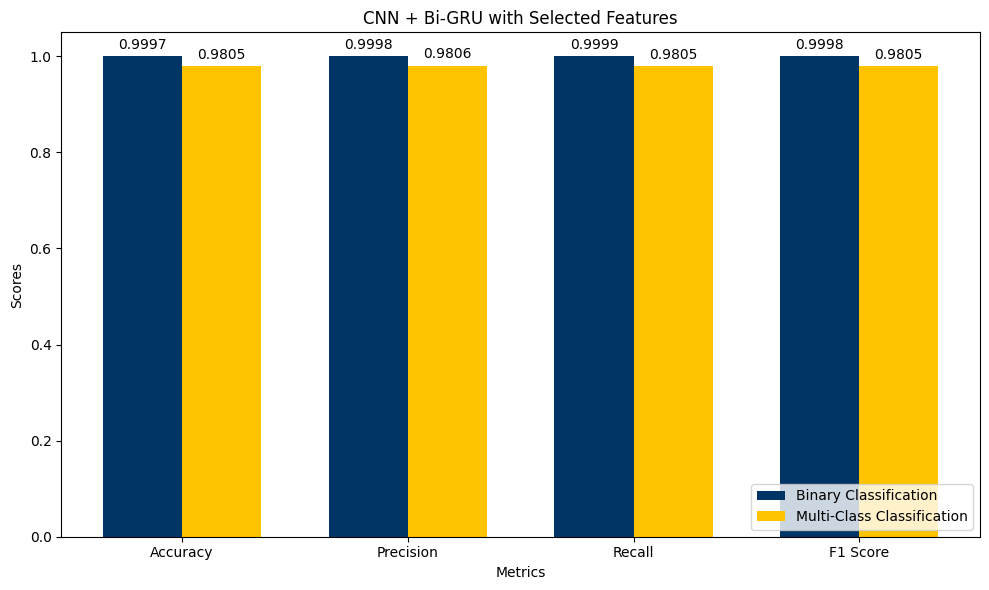

In [ ]:
import matplotlib.pyplot as plt

# Plot the metrics
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
binary_values = [metrics['Binary'][cat] for cat in categories]
multi_class_values = [metrics['Multi-Class'][cat] for cat in categories]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Adjust the size of the plot to a medium size
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, binary_values, width, label='Binary Classification', color='#003566')
rects2 = ax.bar(x + width/2, multi_class_values, width, label='Multi-Class Classification', color='#ffc300')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('CNN + Bi-GRU with Selected Features')
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Place the legend in the bottom right corner
ax.legend(loc='lower right')

# Function to add labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()